# 18.06 pset 6

Due Wednesday October 17 at 10:55am.

## Problem 1 (10 points)

Recall that, if $x \in \mathbb{R}^n$, then $\nabla_x f(x)$ (for a scalar-valued function $f$) is a column vector
$$
\nabla_x f = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}
$$
(This is the "uphill" direction in which $f$ changes most rapidly.)

**(a)** If $f(x) = \frac{x^T A x}{x^T x}$ for some $n \times n$ matrix $A$ (not necessarily symmetric!) and $x \ne 0$, write $\nabla_x f$ as a matrix expression (not individual components) involving $A$ and $x$.

**(b)** For the $f(x)$ from (a), $f(\alpha x)$ has what relationship to $f(x)$ for any real $\alpha \ne 0$?  It follows that $\nabla_x f$ must be *orthogonal* to what vector?  Check that this is true of your answer from (a).

### Solution

**(a)** We have $f(x) = \frac{x^T A x}{x^T x} = (x^TAx)(x^Tx)^{-1}$. We can calculate the partial derivative with respect to $x_i$ using the chain rule, as in class, via $\partial x/\partial x_i = e_i$ where $e_i$ is the unit vector in direction $i$:
\begin{align}
\frac{\partial f}{\partial x_i} = (x^TAx)\frac{\partial}{\partial x_i} \left[(x^Tx)^{-1}\right] + (x^Tx)^{-1}\frac{\partial}{\partial x_i} (x^TAx)
\end{align}
Now
\begin{align}
\frac{\partial}{\partial x_i} (x^Tx)^{-1} &= -(x^Tx)^{-2} \left[e_i^T x + x^Te_i\right] = -\frac{2x_i}{(x^Tx)^2}\\
\frac{\partial}{\partial x_i} (x^TAx) &= e_i^TAx + x^TAe_i
\end{align}
and so we can put these two pieces together by noticing, for example, that $e_i^TAx$ is the ith component of the vector $Ax$, to yield: 
\begin{align}
\boxed{\nabla_x f = \frac{(x^Tx)\left[Ax + A^Tx\right] - 2(x^TAx)x}{(x^Tx)^2}}
\end{align}
If we want, we can simplify this in various ways.   One way to write it would be to substitute in the definition of $f(x)$, to obtain
\begin{align}
\boxed{\nabla_x f = \frac{\left[A + A^T - 2f(x)I\right]x}{x^Tx}}
\end{align}
Another way is to realize that $2x^TAx = x^T Ax + x^T A^T x$ to pull out the $A+A^T$ factor, combined with $(x^TAx)x = xx^TAx$ so that we can pull out $xx^T$:
\begin{align}
\boxed{\nabla_x f = \left(I-\frac{xx^T}{x^Tx}\right)\frac{(A+A^T)x}{x^T x}}
\end{align}
This form is especially nice for part (b) because it contains the explicit orthogonal projection $I-\frac{xx^T}{x^Tx}$ onto the line perpendicular to $x$.

**(b)** If $f(x) = \frac{x^T A x}{x^T x}$, then 
\begin{align}
f(\alpha x) = \frac{(\alpha x)^TA(\alpha x)}{(\alpha x)^T(\alpha x)} = \frac{x^T A x}{x^T x} = f(x)
\end{align}
This then tells us that $f(x)$ is constant along any given line through the origin. We know from 18.02 that the gradient of a function is always perpendicular to the level curves of a function, and so we expect that $\boxed{x^T \nabla_x f = 0}$.  We can easily verify this by plugging in one of our expressions for $\nabla_x f$ above.

From our third expression for $\nabla_x f$, in fact, the $I-\frac{xx^T}{x^Tx}$ factor tells us immediately that the gradient of $f$ is always orthogonal to $x$, because this is the orthogonal projection matrix onto $N(x^T)$.

Alternatively, we can just plug in $x^T \nabla_x f$.  For example, with our first expression above, we get:
\begin{align}
x^T \nabla f(x) &= \frac{(x^Tx)\left[x^TAx + x^TA^Tx\right] - 2(x^TAx)x^Tx}{(x^Tx)^2}\\
&= \frac{(x^Tx)\left[2x^TAx - 2(x^TAx)\right]}{(x^Tx)^2}\\
&= 0 
\end{align}
where the second line follows from the fact that $x^TAx $ is a scalar and so $x^TAx = (x^TAx)^T = x^TA^T x$.

## Problem 2 (5 points)

If $f(A)$ is a scalar function of an $m\times n$ *matrix* $A = \begin{pmatrix} a_{11} & a_{12} & \cdots \\ a_{21} & a_{22} & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix}$, then it is useful define the gradient with respect to the *matrix* as another $m\times n$ matrix:
$$
\nabla_A f = \begin{pmatrix} \frac{\partial f}{\partial a_{11}} & \frac{\partial f}{\partial a_{12}} & \cdots \\ \frac{\partial f}{\partial a_{21}} & \frac{\partial f}{\partial a_{22}} & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix}
$$
Given this definition, give a matrix expression (not in terms of individual components) for $\nabla_A f$ with $f(A) = x^T A y$ where $x\in \mathbb{R}^m$ and $y\in \mathbb{R}^n$ are constant vectors.

(This kind of derivative shows up frequently in machine learning, where $A$ is a "weight" matrix in a neural network.)

### Solution

We have $f(A) = x^TAy = \sum_{p = 1}^m\sum_{q = 1}^n x_p a_{pq} y_q$. It then follows that $\frac{\partial f}{\partial a_{ij}} = x_iy_j$. We can then write 
$$
\nabla_A f = \begin{pmatrix} x_1y_1 & x_1y_2 & \cdots \\ x_2y_1 & x_2y_2 & \cdots \\ \vdots & \vdots & \ddots \end{pmatrix}
$$
We can then identify this matrix as 
$$
\nabla_A f = \begin{pmatrix} x_1 \\ \vdots \\ x_m\end{pmatrix} \begin{pmatrix} y_1 & \cdots & y_n \end{pmatrix} = \boxed{xy^T}
$$

## Problem 3 (10 points)

Suppose that we minimize the length of a vector along a line:
$$
\min_{\alpha \in \mathbb{R}} \Vert u + \alpha v \Vert
$$
for some nonzero vectors $u, v \in \mathbb{R}^n$, finding the minimizer $\hat{\alpha}$.

**(a)** If we write this in the form of a "standard" least-square problem $\min_x \Vert b - Ax \Vert$, what are $A$, $b$, and $x$ in terms of the above?

**(b)** Solve the normal equations to find an explicit solution $\hat{\alpha}$.

**(c)** At this minimum, $u + \hat{\alpha} v$ is orthogonal to what vector?

### Solution

**(a)** We can identify the minimization problem $\min_{\alpha \in \mathbb{R}} \Vert u + \alpha v \Vert$ with the "standard" least-square problem by letting $b = u$, $A = -v$ (an $n\times 1$ matrix), and $x=\alpha$. 

**(b)** The normal equations are $A^TA\hat{x}=A^T b$. In our notation, this becomes
$$
v^T v \hat{\alpha} = -v^T u \implies \hat{\alpha} = -\frac{v^T u}{v^T v}
$$
since $\hat{\alpha}$ is a scalar. 

**(c)** If you draw a picture, you will immediately see the point on the line that is closest to the origin to have a position vector which is orthogonal to the direction vector $v$.  In fact, this was precisely the thinking that led us from least-squares to orthogonal projection!  Explicitly, the error vector $e = b-Ax$ in a least-squares solution is always in the left nullspace of $A$, $N(A^T)$, because least-squares is equivalent to orthogonal projection. This gives us immediately that $\boxed{v^T(u+\hat{\alpha} v) = 0}$.

We can check this for our $\hat{\alpha}$ from part (b):
$$
v^T(u+\hat{\alpha}v) = v^Tu - \frac{v^T u}{v^T v} v^Tv = v^Tu - v^Tu = 0
$$

## Problem 4 (15 points)

Suppose that we have $m$ data points $\{ (a_1, b_1), (a_2, b_2), \ldots, (a_m, b_m) \}$ that we want to perform a least-square fit to a function of the following form:

$$
f(a) = x_1 + x_2 a + x_3 a^2 + x_4 (a-1)^2
$$

That is, we want to minimize $\sum_{i=1}^m [b_i - f(a_i)]^2$ over all possible $x \in \mathbb{R}^4$.

**(a)** Formulate this in matrix form as in class: we are minimizing $\Vert b - Ax \Vert$ for what matrix $A$ and vector $b$?

**(b)** Give the rank of $A$ and $A^T A$ and a basis for $N(A) = N(A^T A)$ (assuming that our data has at least 4 distinct $a_i$ values).  What does this tell you about the solutions to the normal equations $A^T A \hat{x} = A^T b$ for the fit coefficients $\hat{x}$?

**(c)** Modify the following Julia code to create your matrix $A$ from the given data vectors $a$ and $b$ (see also the polynomial fitting examples in the lecture notes) and plot your least-square fit.

**(d)** If the least-square solution is not unique, Julia's `x̂ = A \ b` finds the `x̂` with **minimum length**, i.e. it minimizes $\Vert \hat{x} \Vert$ over all possible solutions to $A^T A \hat{x} = A^T b$.  In this problem, that means that Julia's `x̂` must be **orthogonal to what vector(s)**?  (Hint: see problem 3.) Check that this is true of the result that Julia gives you below.

### Solution 

**(a)** We can formulate $\sum_{i=1}^m [b_i - f(a_i)]^2$  in matrix form $\Vert b - Ax \Vert$, by letting
$$
b = \begin{pmatrix} b_1 \\ \vdots \\ b_m \end{pmatrix}, \;\;
A = \begin{pmatrix} 1 & a_1 & a_1^2 & (a_1-1)^2 \\ 1 & a_2 & a_2^2 & (a_2-1)^2 \\ \vdots & \vdots & \vdots & \vdots \\ 1 & a_m & a_m ^2 & (a_m-1)^2 \end{pmatrix}
$$

**(b)** Firstly we note that $(a_i-1)^2 = a_i^2 - 2a_i + 1$, and so the fourth column of $A$ is a linear combination of the first three columns. The first three columns are linearly independent, and so $rk(A) = 3$. We showed that $N(A) = N(A^TA)$ on the last pset, and since $A$ and $A^TA$ both have four columns, this means that $rk(A^TA) = 3$ also. It also allows us to conclude that $N(A) = N(A^TA)$ has dimension 1. Since we have found how to write the fourth column of $A$ as a linear combination of the first three columns, we can identify that a solution to $Ax_0 = 0$ is given by
$$
x_0 = \begin{pmatrix} -1 \\ 2 \\ -1 \\ 1 \end{pmatrix}.
$$
This vector then forms a basis for $N(A) = N(A^TA)$. 

We know that $A^Tb$ is always in the column space of $A^TA$, since we saw in class that $C(A^T A) = C(A^T)$. Since $A^TA$ is not full rank, this means that the least-squares solution always exists, but it is not unique since we will always be able to add a multiple of $x_0$ to any particular least squares solution and obtain another least squares solution.

**(c)** We can use the code below to plot the least squares fit:

In [1]:
a = [0.6, -0.1, 0.2, 0.3, 0.4, 0.35, 0.01, 0.5, 0.67, 0.88];
b = [1.07943, 1.12779, 0.884219, 0.845884, 0.899928, 0.871585, 0.95691, 1.0084, 1.23807, 1.67931];

In [3]:
A = [ ones(a) a a.^2 (a.-1).^2 ] # concatenate columns, as in class

10×4 Array{Float64,2}:
 1.0   0.6   0.36    0.16  
 1.0  -0.1   0.01    1.21  
 1.0   0.2   0.04    0.64  
 1.0   0.3   0.09    0.49  
 1.0   0.4   0.16    0.36  
 1.0   0.35  0.1225  0.4225
 1.0   0.01  0.0001  0.9801
 1.0   0.5   0.25    0.25  
 1.0   0.67  0.4489  0.1089
 1.0   0.88  0.7744  0.0144

In [4]:
x̂ = A \ b # equivalent to solving normal equations

4-element Array{Float64,1}:
 0.246249
 0.428064
 1.35312 
 0.743244

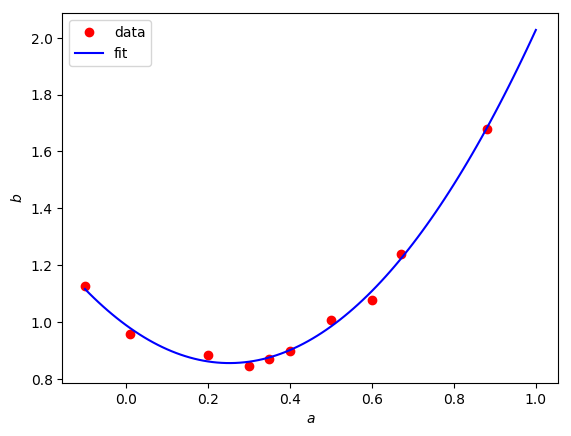

PyObject <matplotlib.legend.Legend object at 0x13a280240>

In [5]:
using PyPlot
plot(a, b, "ro")
â = linspace(-0.1, 1, 100)
plot(â, x̂[1] .+ x̂[2] .* â .+ x̂[3] .* â.^2 +  x̂[4] .* (â .- 1).^2, "b-")
xlabel(L"a")
ylabel(L"b")
legend(["data", "fit"])

**(d)** Julia will find the $\hat{x}$ with minimum length. This means that Julia finds a solution to $A^TA\hat{x}=A^Tb$ which is also gives the minimum value of $\min_{\alpha \in \mathbb{R}} \Vert \hat{x} + \alpha x_0\Vert$, where $x_0$ is the vector that spans our 1-dimensional $N(A^TA)=N(A)$. But we found in problem 3(c) that this $\hat{x}$ must be orthogonal to $x_0$, which we can check explicitly for this example problem:

In [8]:
x₀ = [-1, 2, -1, 1]

4-element Array{Int64,1}:
 -1
  2
 -1
  1

In [9]:
x₀'x̂  # the dot product x₀ᵀ x̂

3.3306690738754696e-16

which is zero to within the computer's usual roundoff errors in the 15–16 digits.  So, as claimed, Julia is indeed finding the minimum-length least-square solution when $A$ is rank-deficient.

## Problem 5 (10 points)

(From Strang 4.2, problem 10.)

Project $a_1 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ onto the line spanned by $a_2 = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$.  Then project the result back onto the line spanned by $a_1$.  Multiply these projection matrices $P_1 P_2$: is this a projection?

### Solution

We can project $a_1$ onto the line spanned by $a_2$ by using the projection formula:
$$
P_2 a_1 = a_2 \frac{a_2^T a_1}{a_2^T a_2} = \frac{1}{5} \begin{pmatrix} 1 \\ 2 \end{pmatrix}
$$
We can then project the result back onto $a_1$ using the analogous projection formula:
$$
P_1 \begin{pmatrix} \frac{1}{5} \\ \frac{2}{5} \end{pmatrix} = a_1 \frac{a_1^T \begin{pmatrix} \frac{1}{5} \\ \frac{2}{5} \end{pmatrix}}{a_1^T a_1} = \frac{1}{5} \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$

We can explicitly calculate the components of the projection matrix using the formulae:
\begin{align}
P_2 &= \frac{a_2 a_2^T}{a_2^Ta_2} = \frac{1}{5}\begin{pmatrix} 1 & 2 \\ 2 & 4 \end{pmatrix}\\
P_1 &= \frac{a_1 a_1^T}{a_1^Ta_1} = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
\end{align}

Multiplying these together yields:
$$
P = P_1P_2 = \frac{1}{5}\begin{pmatrix} 1 & 2 \\ 0 & 0 \end{pmatrix}
$$
This is *not* a projection matrix. In particular, $P^2 = \frac{1}{25} \begin{pmatrix} 1 & 2 \\ 0 & 0 \end{pmatrix} \neq P$.

## Problem 6 (10 points)

(From Strang 4.2 problem 19.)

To find the projection matrix onto the plane $x-y-2z=0$, choose two vectors in that plane (the null space of what matrix?) and make them columns of $A$ so that the plane is $C(A)$.  Then compute (by hand) the projection of the point $\begin{pmatrix} 0 \\ 6 \\ 12 \end{pmatrix}$ onto this plane, and check your result in Julia.

### Solution

We first want to find two linearly independent vectors $(x,y,z)$ lying in the plane described by the equation $x-y-2z=0$. This means we want to find the nullspace of the $1 \times 3$ matrix $A= (1 -1 -2)$. This matrix $A$ is in rref form, where the first column is the pivot column, and the last two columns are free columns. We can then seek two special solutions to $Ay = 0$ of the usual form:
\begin{align}
y = \begin{pmatrix} y_1 \\ 1 \\ 0 \end{pmatrix}, \;\;\; \text{and}  \;\;\; y = \begin{pmatrix} y_2 \\ 0 \\ 1 \end{pmatrix}
\end{align}
We then solve to find $y_1 = 1$ and $y_2 =2$, so that a basis for the null space of $A$ is given by the two vectors
\begin{align}
\begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}, \;\;\; \text{and}  \;\;\;  \begin{pmatrix} 2 \\ 0 \\ 1 \end{pmatrix}
\end{align}
We can then define a $3\times 2$ matrix $A$ as
$$
A = \begin{pmatrix} 1 & 2 \\ 1 & 0 \\ 0 & 1 \end{pmatrix} 
$$
so that $C(A)$ is the plane in question. We can then compute the projection $p$ of $b = \begin{pmatrix} 0 \\ 6 \\ 12 \end{pmatrix}$ onto this plane by
$$
p = A\underbrace{(A^T A)^{-1}A^Tb}_\hat{x}
$$
As usual, we want to avoid explicitly inverting any matrices if we can, so we will find $\hat{x}$ by solving the normal equations $A^TA\hat{x} = A^Tb$.  We can then compute $p=A\hat{x}$. We can compute
\begin{align}
A^TA &= \begin{pmatrix} 2 & 2 \\ 2 & 5 \end{pmatrix},\\
A^Tb &= \begin{pmatrix} 6 \\ 12 \end{pmatrix}.\\
\end{align}
Then we have the equation 
\begin{align}
\begin{pmatrix} 2 & 2 \\ 2 & 5 \end{pmatrix}\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} 6 \\ 12 \end{pmatrix}
\end{align}
which gives us a linear system
\begin{align}
2x_1 + 2x_2 &= 6\\
2x_1 + 5x_2 &= 12
\end{align}
with solution $x_1 =1 , x_2 =2 $. We can then find the projection $p=A\hat{x}$:
\begin{align}
p = \begin{pmatrix} 1 & 2 \\ 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 2 \end{pmatrix} = \begin{pmatrix} 5 \\ 1 \\ 2 \end{pmatrix}
\end{align}
We can then check this result explicitly in Julia:

In [11]:
A = [2 0
     0 2
     1 -1]
b = [0
     6
     12]
p = A*(A\b)

3-element Array{Float64,1}:
 5.0
 1.0
 2.0

Note that we don't compute $(A^T A)^{-1}$ explicitly in Julia, either, because the solution to the normal equations is computed more accurately and efficiently by `A \ x`.

Of course, we could compute the explicit projection matrix if we wanted to, and we would get the same result:

In [12]:
P = A*inv(A'A)*A'
P*b

3-element Array{Float64,1}:
 5.0
 1.0
 2.0

## Problem 7 (10 points)

(From Strang, section 4.2, problem 30.)

**(a)** Find the projection matrix $P_C$ onto the column space $C(A)$ (after looking closely at the matrix!) for $A = \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix}$.

**(b)** Find the 3 by 3 projection matrix $P_R$ onto the row space of $A$.  (You can google the formula for the inverse of a 2 by 2 matrix to try to shorten your algebra… though the fact that A is rank-deficient may give you some trouble… but there is an even simpler way to do it if you realize that the row space is `_____`-dimensional.)  Multiply $B = P_C A P_R$.  Your answer $B$ may be a little surprising at first — can you explain it?

### Solution

**(a)** Notice that $A$ only has one linearly independent column, so $C(A)$ is spanned by the vector $x_1 = \begin{pmatrix} 3 \\ 4 \end{pmatrix}$. We can then find the projection matrix $P_C$ using the simple formula for projecting onto a vector:
$$
P_C = \frac{x_1 x_1^T}{x_1^T x_1} = \frac{1}{25}\begin{pmatrix} 9 & 12 \\ 12 & 16 \end{pmatrix} 
$$

**(b)** Similarly, the row space is one dimensional and is spanned by the vector $x_2 = \begin{pmatrix} 1 \\ 2 \\ 2 \end{pmatrix}$.  We can then find the projection matrix $P_R$ using the simple formula for projecting onto a vector:
$$
P_R = \frac{x_2 x_2^T}{x_2^T x_2} = \frac{1}{9}\begin{pmatrix} 1 & 2 & 2 \\  2 & 4 & 4 \\ 2 & 4 & 4 \end{pmatrix} 
$$
We can then multiply $B = P_CAP_R$
\begin{align}
B = P_CAP_R = \frac{1}{25\times 9}\begin{pmatrix} 9 & 12 \\ 12 & 16 \end{pmatrix} \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix} \begin{pmatrix} 1 & 2 & 2 \\  2 & 4 & 4 \\ 2 & 4 & 4 \end{pmatrix}
= \begin{pmatrix} 3 & 6 & 6 \\ 4 & 8 & 8 \end{pmatrix} = A
\end{align}

Since $A$ is rank one, we can write $A = uv^T$, where $u = x_1$ and $v = x_2$. Then
$$
AP_R = \frac{(x_1x_2^T)(x_2x_2^T)}{(x_2^Tx_2)} = x_1x_2^T =A\\
AP_R = \frac{(x_1x_1^T)(x_1x_2^T)}{(x_1^Tx_1)} = x_1x_2^T =A\\
$$

So even better than $P_CAP_R = A$, we have *both* that $P_CA = A$ and $AP_R = A$ (and then $P_CAP_R = A$ follows from these two).

  - Why is $P_CA = A$?  Well, two matrices $M, N$ of the same size are equal if and only if $Mx = Nx$ for all possible column vectors $x$ so that the multiplication makes sense.  So to see that $P_CA = A$, we only need to see that $P_CAx = Ax$ for any vector $x$; but $Ax$ is in the column space $C(A)$, so it's projection $P_CAx$ is itself, i.e. $P_CAx = Ax$.  So $P_CA = A$.
  
  - Similarly, to check that $AP_R = A$ we can just check that $AP_Rx = P_Rx$ for all possible $x$.  Any $x$ in $\mathbb{R}^n$ (let's say that $A$ is $m \times n$ can be written in the form $x = x_n + x_r$ with $x_n$ in the nullspace and $x_r$ in the row space of $A$ (because these spaces are orthogonal complements).  So it's enough to check that $AP_Rx_r = Ax_r$ and $AP_rx_n = Ax_n$.  In the first case, we have $P_Rx_r = x_r$ by definition of projection, so indeed $AP_Rx_r = Ax_r$.  In the second case, we have $P_Rx_n = 0$ because $N(A)$ and $C(A^T)$ are orthogonal; as $Ax_n = 0$ as well by the definition of nullspace, we have $AP_Rx_n = Ax_n (= 0)$.  So $AP_Rx = Ax$ for all $x$, so $AP_R = A$.

## Problem 8 (10 points)

Given two $m \times n$ matrices $A$ and $B$ and two right-hand sides $b, c \in \mathbb{R}^m$, suppose that we want to minimize:
$$
f(x) = \Vert b - Ax \Vert^2 + \Vert c - Bx \Vert^2
$$
over $x \in \mathbb{R}^n$.  That is, we are minimizing the *sum* of two least-square fitting problems.

**(a)** $\Vert b \Vert^2 + \Vert c\Vert^2 = \Vert w \Vert^2 $ for a vector $w\in\mathbb{R}^{2m}$.  Give such a $w$.

**(b)** Write down a matrix equation $C \hat{x} = d$ whose solution $\hat{x}$ gives the minimum of $f(x)$.  Give explicit formulas for $C$ and $d$ in terms of $A, B, b, c$.  Hint: use your answer from (a) to convert this into a "normal" least-squares problem first.

### Solution

**(a)** The vector $w = \begin{pmatrix} b \\ c \end{pmatrix}$ has $\Vert b \Vert^2 + \Vert c\Vert^2 = \Vert w \Vert^2$

**(b)** We can then write $f(x) = \Vert b - Ax \Vert^2 + \Vert c - Bx \Vert^2 = \Vert \begin{pmatrix} b \\ c \end{pmatrix} - \begin{pmatrix} A \\ B \end{pmatrix} x \Vert^2$, so that the minimum of $f(x)$ is found at $\hat{x}$ obeying $C\hat{x} = d$, where:
\begin{align}
C &= \begin{pmatrix} A \\ B \end{pmatrix}^T \begin{pmatrix} A \\ B \end{pmatrix} = \begin{pmatrix} A^T & B^T \end{pmatrix}\begin{pmatrix} A \\ B \end{pmatrix} = A^TA+ B^TB\\
d &= \begin{pmatrix} A \\ B \end{pmatrix}^T \begin{pmatrix} b \\ c \end{pmatrix} = A^Tb + B^Tc
\end{align}